# Polynomial Regression with Scikit-Learn

# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../Data/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
X=df.drop('sales',axis=1)
y=df['sales']

# Polynomial Regession

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [10]:
poly_feature=poly_converter.fit_transform(X)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_feature

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [13]:
X.shape

(200, 3)

In [14]:
poly_feature.shape

(200, 9)

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split( poly_feature, y, test_size=0.3, random_state=101)

Create an insatance of model with parameters

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
poly_model=LinearRegression(fit_intercept=True)

# Fit/Train model on training data

In [19]:
poly_model.fit(X_train,y_train)

LinearRegression()

# Calculate performance on Test data

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
y_pred=poly_model.predict(X_test)

In [22]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

In [23]:
MAE

0.4896798044803798

In [24]:
MSE

0.4417505510403729

In [25]:
RMSE

0.6646431757269257

# Adjusting Parameters

Choose the best degree for polynomial regression

In [26]:
train_rmse_errors = []
test_rmse_errors = []

for d in range (1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_feature=poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split( poly_feature, y, test_size=0.3, random_state=101)
    
    model=LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    y_test_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    
    test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
    train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

Check for overfitting or underfitting

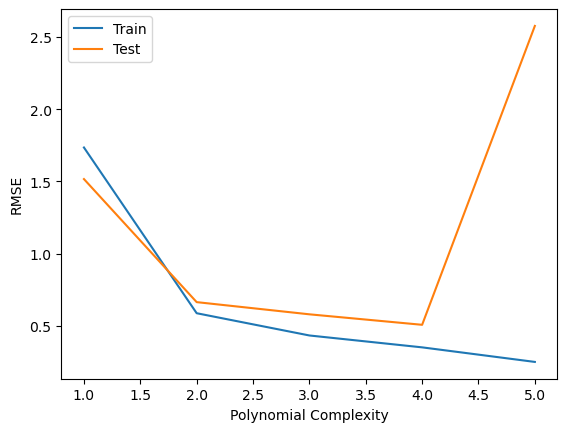

In [27]:
plt.plot(range(1,6),train_rmse_errors[:5],label='Train')
plt.plot(range(1,6),test_rmse_errors[:5],label='Test')
plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.legend()

After checking the graph we choose degree=3 

# Final Model

In [28]:
poly_converter=PolynomialFeatures(degree=3,include_bias=False)
poly_feature=poly_converter.fit_transform(X)
    
final_model=LinearRegression(fit_intercept=True)
final_model.fit(poly_feature,y)


LinearRegression()

prediction on new Data

In [29]:
campaign = [[149,22,12]]

In [30]:
poly_feature=poly_converter.fit_transform(campaign)
final_model.predict(poly_feature)

array([14.64501014])

# Deployment of Model

In [31]:
from joblib import dump,load

In [32]:
dump(final_model,'sales_poly_model.joblib')
dump(poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

# The End